##### This is a classification problem. The data has 615 rows and 13 columns. Problem: Predict if a loan will get approved or not.

In [1]:
import os
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#set the working directory
os.chdir("/Users/ajeet/Google Drive/DS/Projects/Classification/loan_Prediction")

In [3]:
os.getcwd()

'/Users/ajeet/Google Drive/DS/Projects/Classification/loan_Prediction'

In [4]:
ls

test_loan.csv   train_loan.csv


Load the train and test data

In [5]:
data = pd.read_csv("train_loan.csv")

In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# 1-Analysing the Data Types

In [8]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
#First need to find the uniques values based on that we define which are categorical or numerical
for col in data:
    print(col)
    print(data[col].dtype)
    print(data[col].nunique())
#data['Credit_History'].unique()

Loan_ID
object
614
Gender
object
2
Married
object
2
Dependents
object
4
Education
object
2
Self_Employed
object
2
ApplicantIncome
int64
505
CoapplicantIncome
float64
287
LoanAmount
float64
203
Loan_Amount_Term
float64
10
Credit_History
float64
2
Property_Area
object
3
Loan_Status
object
2


Here we can see that - Loan_Amount_Term has 10 unique values , so it should be a categorical variable but here it is continuous so we need to change it from the numerical to categorical, likewise, 

Credit_History=> Numerical to categorical since it has only 2 unique values.

In [10]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('object')
data['Credit_History'] = data['Credit_History'].astype('object')

In [11]:
data['Loan_Amount_Term'].dtype
data['Credit_History'].dtype

dtype('O')

In [12]:
#verify that each column has the right datatype
for col in data:
    print(col)
    print(data[col].dtype)
    print(data[col].nunique())
    print("\n")
#data['Credit_History'].unique()

Loan_ID
object
614


Gender
object
2


Married
object
2


Dependents
object
4


Education
object
2


Self_Employed
object
2


ApplicantIncome
int64
505


CoapplicantIncome
float64
287


LoanAmount
float64
203


Loan_Amount_Term
object
10


Credit_History
object
2


Property_Area
object
3


Loan_Status
object
2




# 2-Missing value Analysis

In [13]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
data.shape

(614, 13)

In [15]:
(data['Self_Employed'].isnull().sum()/len(data))*100

5.211726384364821

It is only 6%, We can impute these missing values

## Impute Missing values

There are 6 variable having missing values-Gender, Dependents,Self_Employed,LoanAmount, Loan_Amount_Term, Credit_History

### <font color = red>1-Gender<font>

In [16]:
data['Gender'].isnull().sum()

13

In [17]:
data['Gender'].dtype

dtype('O')

Since it a categorical variable we need to find the most frequent category.

In [18]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Since male -286, much more than female candidate, so we fill missing value with male string.

In [19]:
type(data['Gender'])

pandas.core.series.Series

In [20]:
data['Gender'].fillna('Male', inplace=True)

now again, check the count and missing values

In [21]:
data['Gender'].isnull().sum()

0

In [22]:
data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

### <font color = red>2-Dependents<font>

In [23]:
data['Dependents'].isnull().sum()

15

In [24]:
data['Dependents'].dtype

dtype('O')

In [25]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

frequency of 0 is more so we will impute missing values with 0(zero)

In [26]:
data['Dependents'].fillna('0',inplace = True)

now check again.

In [27]:
data['Dependents'].isnull().sum()

0

In [28]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

# <font color = red>Removing unwanted suffix/prefix from the values present in the column</font>

In [29]:
data['Dependents'] = data['Dependents'].replace('3+', "3")

In [30]:
data['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

### <font color = red>3-Self_Employed<font>

In [31]:
data['Self_Employed'].isnull().sum()

32

In [32]:
data['Self_Employed'].dtype

dtype('O')

In [33]:
data['Self_Employed'].value_counts()


No     500
Yes     82
Name: Self_Employed, dtype: int64

Fill missimg values with NO

In [34]:
data['Self_Employed'].fillna('No', inplace = True)

In [35]:
data['Self_Employed'].isnull().sum()

0

In [36]:
data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

### <font color = red>4-LoanAmount<font>

In [37]:
data['LoanAmount'].isnull().sum()

22

In [38]:
data['LoanAmount'].dtype

dtype('float64')

In [39]:
data['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
128.0    11
113.0    11
130.0    10
96.0      9
95.0      9
70.0      8
115.0     8
112.0     8
150.0     7
135.0     7
136.0     7
132.0     7
125.0     7
104.0     7
80.0      6
81.0      6
138.0     6
90.0      6
158.0     6
116.0     6
175.0     6
144.0     6
155.0     6
180.0     6
152.0     5
         ..
315.0     1
101.0     1
73.0      1
142.0     1
48.0      1
164.0     1
83.0      1
191.0     1
166.0     1
495.0     1
59.0      1
214.0     1
240.0     1
72.0      1
42.0      1
349.0     1
280.0     1
405.0     1
279.0     1
304.0     1
650.0     1
436.0     1
78.0      1
54.0      1
89.0      1
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [40]:
data['LoanAmount'].dtype


dtype('float64')

# Dont RUN FROM HERE

Since it is a continuous variable so , to impute missing values first try with Mean, Meadian and KNN inputation, and fill with the appropiate one

In [41]:
#copy the dataframe into new varaible for testing--
df = data.copy()

In [42]:
#print the actual value
df.iloc[23,8]

112.0

In [43]:
#Actual Value is -- 125 at (23,8),
#MEan = 136
#Meadian = 146.470
#Now make empty this location and try to fill with diff methods
df.iloc[23,8] = 'NaN'

In [44]:
df.iloc[23,8]

'NaN'

In [45]:
df['LoanAmount'] = df['LoanAmount'].astype('float')

In [46]:
#mean method
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [47]:
df.iloc[23,8]

146.4703891708968

In [48]:
#Median method 
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].median())

In [49]:
df.iloc[23,8]

146.4703891708968

In [50]:
#Actual Value is -- 125 at (23,8),
#MEan = 136
#Meadian = 146.470
#KNN= 96.38085250852306

To aplly KNN Imputation first we need to encode the categorical variables, then we can apply KNN Imputation.

In [51]:
lis = []
for i in range(0,df.shape[1]):
    if(df.iloc[:,i].dtype == 'object'):
        df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
        print(df.iloc[:,i].name)
        print(df.iloc[:,i].dtype)
        df.iloc[:,i] = df.iloc[:,i].cat.codes
        df.iloc[:,i] = df.iloc[:,i].astype('object')
        lis.append(df.columns[i])

Loan_ID
category
Gender
category
Married
category
Dependents
category
Education
category
Self_Employed
category
Loan_Amount_Term
category
Credit_History
category
Property_Area
category
Loan_Status
category


In [52]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.470389,8,1,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,8,1,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,8,1,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,8,1,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,8,1,2,1


In [53]:
df['Gender'].dtype

dtype('O')

In [54]:
df.iloc[23,8]

146.4703891708968

In [55]:
df.iloc[23,8] = 'NaN'

In [56]:
df.iloc[23,8]

'NaN'

In [57]:
from fancyimpute import KNN
df = pd.DataFrame(KNN(k=3).complete(df), columns = df.columns)

/Users/ajeet/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Imputing row 1/614 with 0 missing, elapsed time: 0.079
Imputing row 101/614 with 0 missing, elapsed time: 0.079
Imputing row 201/614 with 0 missing, elapsed time: 0.080
Imputing row 301/614 with 0 missing, elapsed time: 0.080
Imputing row 401/614 with 0 missing, elapsed time: 0.080
Imputing row 501/614 with 0 missing, elapsed time: 0.080
Imputing row 601/614 with 0 missing, elapsed time: 0.081


In [58]:
df.iloc[23,8]

96.38085250852306

#Actual Value is -- 125 at (23,8),
#MEan = 136
#Meadian = 146.470
#KNN= 96.38085250852306

So we will go for Mean method to impute missing values for numerical columns for this dataset.

Our original dataset is 'Data', df we created only to test the imputing method .

# Till Here----------------------------------------------------------------

In [59]:
data['LoanAmount'].isnull().sum()


22

In [60]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [61]:
data['LoanAmount'].isnull().sum()

0

### <font color = red>5-Loan_Amount_Term<font>

In [62]:
data['Loan_Amount_Term'].isnull().sum()

14

In [63]:
data['Loan_Amount_Term'].dtypes

dtype('O')

In [64]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

frequency os 360 is more so we will fill the null values with 360.

In [65]:
data['Loan_Amount_Term'].fillna('360', inplace = True)

In [66]:
data['Loan_Amount_Term'].isnull().sum()

0

### <font color = red>6-Credit_History<font>


In [67]:
data['Credit_History'].isnull().sum()

50

In [68]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Fill with 1.

In [69]:
data['Credit_History'].fillna(1.0, inplace = True)


In [70]:
data['Credit_History'].replace('1', 1.0, inplace = True)

In [71]:
data['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [72]:
data['Credit_History'].isnull().sum()

0

### <font color = red>7-Married<font>


In [73]:
data['Married'].isnull().sum()

3

In [74]:
data['Married'].dtype

dtype('O')

In [75]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

Impute with Yes

In [76]:
data['Married'].fillna('Yes', inplace = True)

In [77]:
data['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

We have imputed all the missing values of the dataset.

In [78]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# <font color = red>Feature matrix and target variable vector extraction 

In [79]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360,1.0,Urban,Y


# 4-Outlier Analysis

In [80]:
X = data.iloc[:,1:12].values
            
y = data.iloc[:,12].values

In [81]:
X

array([['Male', 'No', '0', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '2', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'No', '0', ..., 360.0, 0.0, 'Semiurban']], dtype=object)

In [82]:
X[:,5].dtype

dtype('O')

### 1. ApplicantIncome

In [83]:
data['ApplicantIncome'].dtype

dtype('int64')

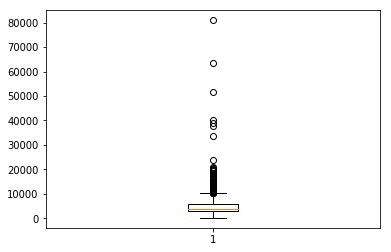

In [84]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

Here we need to remove ApplicantIncome having values greater than 4k, 

In [85]:
len(data)

614

In [86]:
len(data[data['ApplicantIncome']<=40000])

611

There are 3 rows I can remove 

In [87]:
 data  = data[data['ApplicantIncome']<=40000]

In [88]:
len(data)

611

### 2- CoapplicantIncome

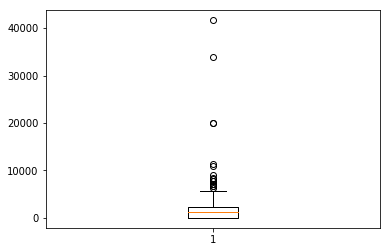

In [89]:
plt.boxplot(data['CoapplicantIncome'])
plt.show()

In [90]:
len(data[data['CoapplicantIncome']>10000])

6

We need to drop all the observation which value greater than 10k.

In [91]:
len(data)

611

In [92]:
 data  = data[data['CoapplicantIncome']<=10000]

In [93]:
len(data)

605

Because 611-6 = 605, we have removed 6 rows which have the CoapplicantIncome column value > 10k.

### 3- LoanAmount

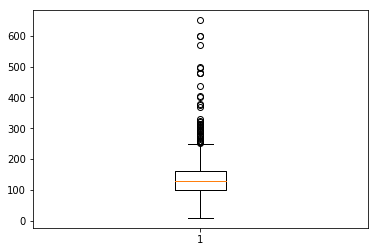

In [94]:
plt.boxplot(data['LoanAmount'])
plt.show()

In [95]:
len(data)

605

In [96]:
len(data[data['LoanAmount']>500])

4

So we need to remove these 4 rows

In [97]:
data = data[data['LoanAmount']<=500]

In [98]:
len(data)

601

605-4 = 601, Now there are 601 obercation are there in the dataset

### Extract Feature matrix and the target variable vector from the dataset

In [99]:
X = data.iloc[:,1:12].values
            
y = data.iloc[:,12].values

In [100]:
X

array([['Male', 'No', '0', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '2', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'No', '0', ..., 360.0, 0.0, 'Semiurban']], dtype=object)

# 5- Encode Categorial Data

In [101]:
data1 = data.copy()

In [102]:
X[0]

array(['Male', 'No', '0', 'Graduate', 'No', 5849, 0.0, 146.41216216216216,
       360.0, 1.0, 'Urban'], dtype=object)

In [103]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
cat_names = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

for i in cat_names:
    data1[i] = labelEncoder_X.fit_transform(data1[i])
#data1['Gender','Married'] = labelEncoder_X.fit_transform(data1['Gender','Married'])

In [104]:
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360,1.0,2,1


In [105]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360,1.0,Urban,Y


In [106]:
data['Gender'].value_counts()

Male      491
Female    110
Name: Gender, dtype: int64

### Create feature dataframe and the target variable datafarme

In [107]:
featureDF = data1.iloc[:,1:12]

In [108]:
featureDF.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360,1.0,2


In [109]:
targetDf = data1.iloc[:,12]

In [110]:
targetDf.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

### Dummy variable creation:

In [111]:
featureDF['Married'].dtype

dtype('int64')

In [112]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder?
oneHotEncoder = OneHotEncoder(categorical_features= [0,1,2,3,4,8,9,10])
featureDF = oneHotEncoder.fit_transform(featureDF).toarray()

In [113]:
featureDF.shape

(601, 30)

In [114]:
data1.shape

(601, 13)

In [115]:
featureDF

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        5.84900000e+03, 0.00000000e+00, 1.46412162e+02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        4.58300000e+03, 1.50800000e+03, 1.28000000e+02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        3.00000000e+03, 0.00000000e+00, 6.60000000e+01],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        8.07200000e+03, 2.40000000e+02, 2.53000000e+02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        7.58300000e+03, 0.00000000e+00, 1.87000000e+02],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        4.58300000e+03, 0.00000000e+00, 1.33000000e+02]])

# 6- Splitting the Dataset into the Training set and Test set

In [116]:
from sklearn.cross_validation import train_test_split

/Users/ajeet/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [117]:
X_train, X_test, y_train, y_test = train_test_split(featureDF,targetDf , test_size = 0.2, random_state =0)

In [118]:
X_train

array([[0.000e+00, 1.000e+00, 1.000e+00, ..., 2.769e+03, 1.542e+03,
        1.900e+02],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 4.625e+03, 2.857e+03,
        1.110e+02],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 4.708e+03, 1.387e+03,
        1.500e+02],
       ...,
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 6.216e+03, 0.000e+00,
        1.330e+02],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 1.907e+03, 2.365e+03,
        1.200e+02],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 3.417e+03, 1.750e+03,
        1.860e+02]])

# 7- Feature Scaling

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
sc = StandardScaler()

In [121]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [122]:
X_train

array([[-0.47050403,  0.47050403,  1.39455558, ..., -0.58210658,
         0.04934443,  0.69068303],
       [-0.47050403,  0.47050403, -0.71707432, ..., -0.0809066 ,
         0.81357096, -0.43525783],
       [-0.47050403,  0.47050403, -0.71707432, ..., -0.05849302,
        -0.0407355 ,  0.12058639],
       ...,
       [-0.47050403,  0.47050403,  1.39455558, ...,  0.34873196,
        -0.84680561, -0.12170468],
       [ 2.12538029, -2.12538029,  1.39455558, ..., -0.81488372,
         0.52763982, -0.30698608],
       [-0.47050403,  0.47050403, -0.71707432, ..., -0.40711865,
         0.17022589,  0.63367336]])

# 8-Feature Engineering

### Feature selection with correlation and random forest classification

In [123]:
from sklearn import tree

In [124]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [125]:
pred_values = clf.predict(X_test)

In [126]:
pred_values

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0])

In [127]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_values)

array([[22, 20],
       [15, 64]])

In [128]:
Accuracy = (23+60)/121

In [129]:
Accuracy

0.6859504132231405

### Applying k-Fold Cross Validation on Decision Tree

In [130]:
from sklearn.model_selection import cross_val_score
accuracies_DT = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 5)
accuracies_DT.mean()

0.7520620817507687

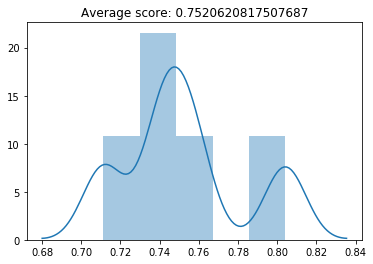

In [131]:
sb.distplot(accuracies_DT)
plt.title('Average score: {}'.format(np.mean(accuracies_DT)))
plt.show()

We can see that this model is overfitting, now use the Random forest method

### Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rf = RandomForestClassifier(n_estimators=100) # initialize

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [134]:
yPred_RF = rf.predict(X_test)

In [135]:
confusion_matrix(y_test, yPred_RF)

array([[17, 25],
       [ 3, 76]])

In [136]:
Accuracy_RF = (17+75)/121

In [137]:
Accuracy_RF

0.7603305785123967

In [138]:
sb.distplot(accuracies)
plt.title('Average score: {}'.format(np.mean(accuracies)))
plt.show()

NameError: name 'accuracies' is not defined

### Applying k-Fold Cross Validation on Random Forest

In [139]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.8185347011144882

In [140]:
accuracies

array([0.87755102, 0.91836735, 0.7755102 , 0.79166667, 0.8125    ,
       0.8125    , 0.72916667, 0.80851064, 0.85106383, 0.80851064])

Now the accuracy is 81.66%

In [141]:
import seaborn as sb

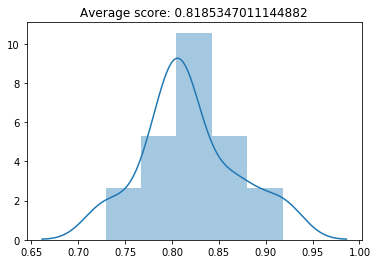

In [142]:
sb.distplot(accuracies)
plt.title('Average score: {}'.format(np.mean(accuracies)))
plt.show()

In [143]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [144]:
models = []
models.append(("LoR", LogisticRegression()) )
models.append(("LDA", LinearDiscriminantAnalysis()) )
models.append(("QDA", QuadraticDiscriminantAnalysis()) )
models.append(("SVC", SVC()) )
models.append(("LSVC", LinearSVC()) )
models.append(("SGD", SGDClassifier()) )
models.append(("KNN", KNeighborsClassifier()) )
models.append(("GNB", GaussianNB() ))
models.append(("DT", DecisionTreeClassifier()) )
models.append(("RF", RandomForestClassifier()) )


LoR
0.8311701935250497


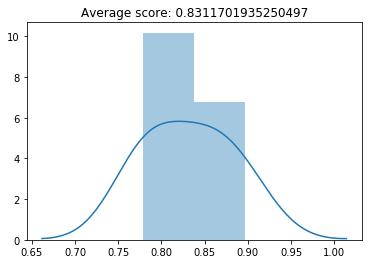



LDA
0.8311701935250497


/Users/ajeet/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/ajeet/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/ajeet/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/ajeet/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/ajeet/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


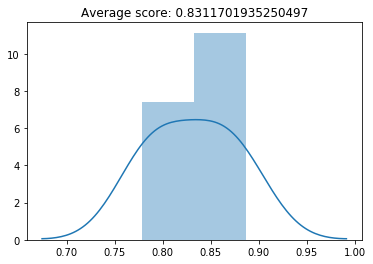



QDA
0.4297712063664315


/Users/ajeet/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/ajeet/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/ajeet/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/ajeet/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/ajeet/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


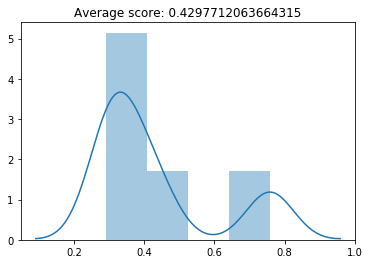



SVC
0.8270250045216132


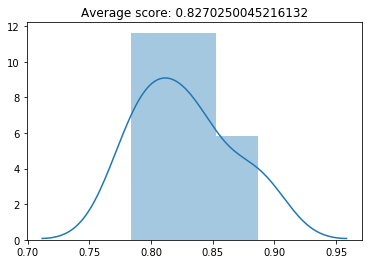



LSVC
0.8332320491951528


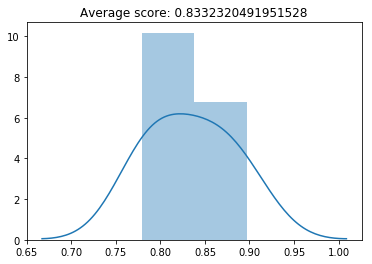



SGD
0.7348498824380539


/Users/ajeet/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/ajeet/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/ajeet/ana

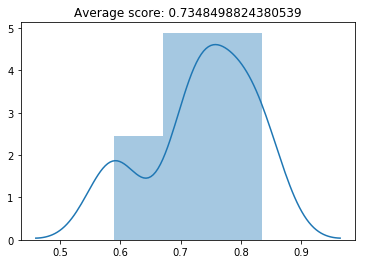



KNN
0.8186692892023875


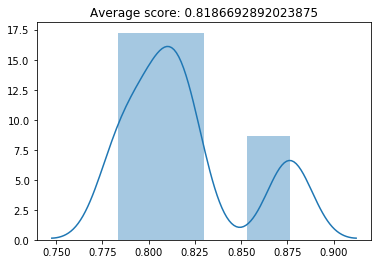



GNB
0.3989301862904685


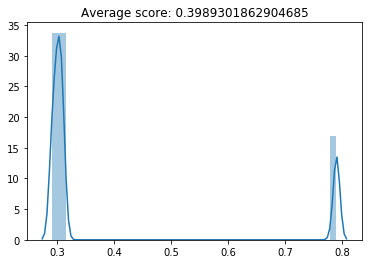



DT
0.7541668927473323


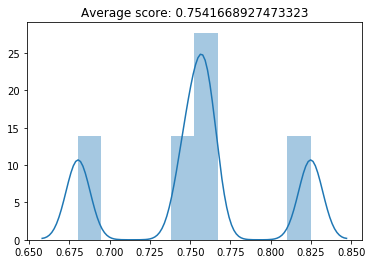



RF
0.7833152468800868


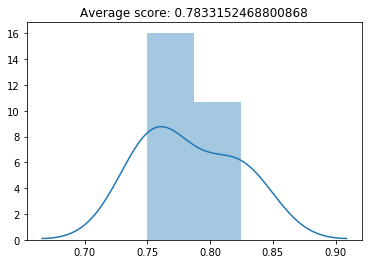

In [145]:
for name, model in models:
     #cross validation among models, score based on accuracy
     accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
     print(name)
     print(accuracies.mean())
     sb.distplot(accuracies)
     plt.title('Average score: {}'.format(np.mean(accuracies)))
     plt.show()
     print("\n")

From here we can see that the best accuracy is provided by LSVC(LinearSVC), LDA(LinearDiscriminantAnalysis), LoR(LogisticRegression)

In [146]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360,1.0,Urban,Y


In [147]:
g = sb.pairplot?

In [ ]:
g = sb.pairplot

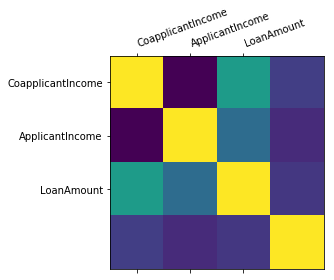

In [148]:
fig, ax = plt.subplots(nrows=1, ncols=1)
    
cax = ax.matshow(data.corr())

col = ['CoapplicantIncome','ApplicantIncome','LoanAmount']

ticks = list(range(len(col)))
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(col, rotation=20, horizontalalignment='left')
ax.set_yticklabels(col)

plt.tight_layout()
plt.show()


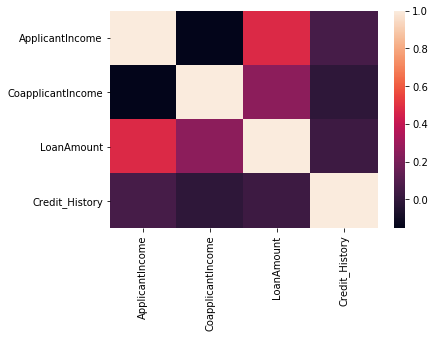

In [149]:
%matplotlib inline
# Calculate correlations
corr = data.corr()
 
# Heatmap
sb.heatmap(corr)


We can see that there is no Correlation among the variables.

In [150]:
#Comment Added